In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gamma Correction

In [2]:
def gamma_correction(image: np.ndarray, gamma: float) -> np.ndarray:
    constant = 255
    result = np.array(constant * (image / 255) ** gamma, dtype=np.uint8)
    return result

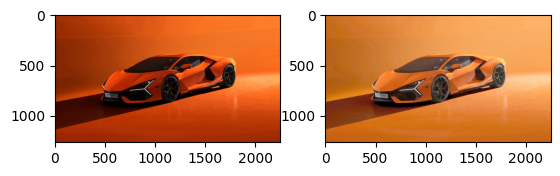

In [3]:
img = cv2.imread('2024-lamborghini-revuelto-127-641a1d518802b.jpg')
result = gamma_correction(img, 0.5)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.Figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(result)


# Log Transformation

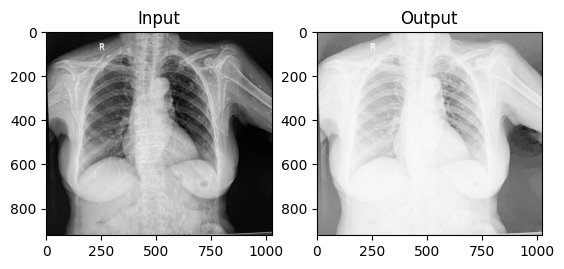

In [4]:
def log_transformation(image: np.ndarray) -> np.ndarray:
    c = 255 / np.log(1 + np.max(image))
    s = c * np.log(1 + image)
    s = np.array(s, dtype=np.uint8)
    return s

img_1 = cv2.imread('san-lon-1024x922.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
res = log_transformation(img_1)
plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.title("Input")
plt.subplot(1,2,2)
plt.imshow(res, cmap="gray")
plt.title("Output")
plt.show()

# Contrast Stretching

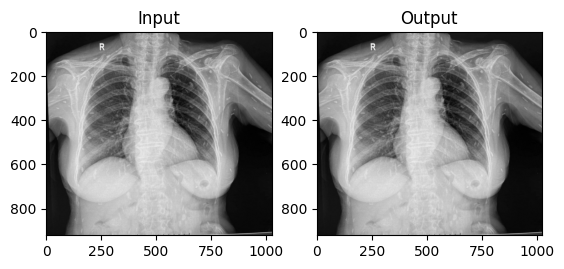

In [5]:
def Contrast_Stretching(image: np.ndarray) -> np.ndarray:
    s = (image - np.min(image))/(np.max(image) - np.min(image)) * 255
    # s = np.array(s, dtype=np.uint8)
    return s

# Stretch theo khoảng [32, 200] chẳng hạn
res_1 = Contrast_Stretching(img_1)

plt.subplot(1,2,1)
plt.imshow(img_1, cmap="gray")
plt.title("Input")

plt.subplot(1,2,2)
plt.imshow(res_1, cmap="gray")
plt.title("Output")



plt.show()

# Intensity - Level Slicing

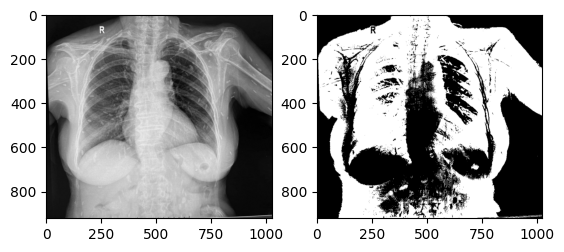

In [6]:
def intensity_level_slicing(image: np.ndarray, a: int, b: int) -> np.ndarray:
    result = np.zeros_like(image)
    result[(image >= a) & (image <= b)] = 255
    return result

res_4 = intensity_level_slicing(img_1, 64, 192)
plt.Figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(res_4, cmap="gray")


# Plotting Histogram

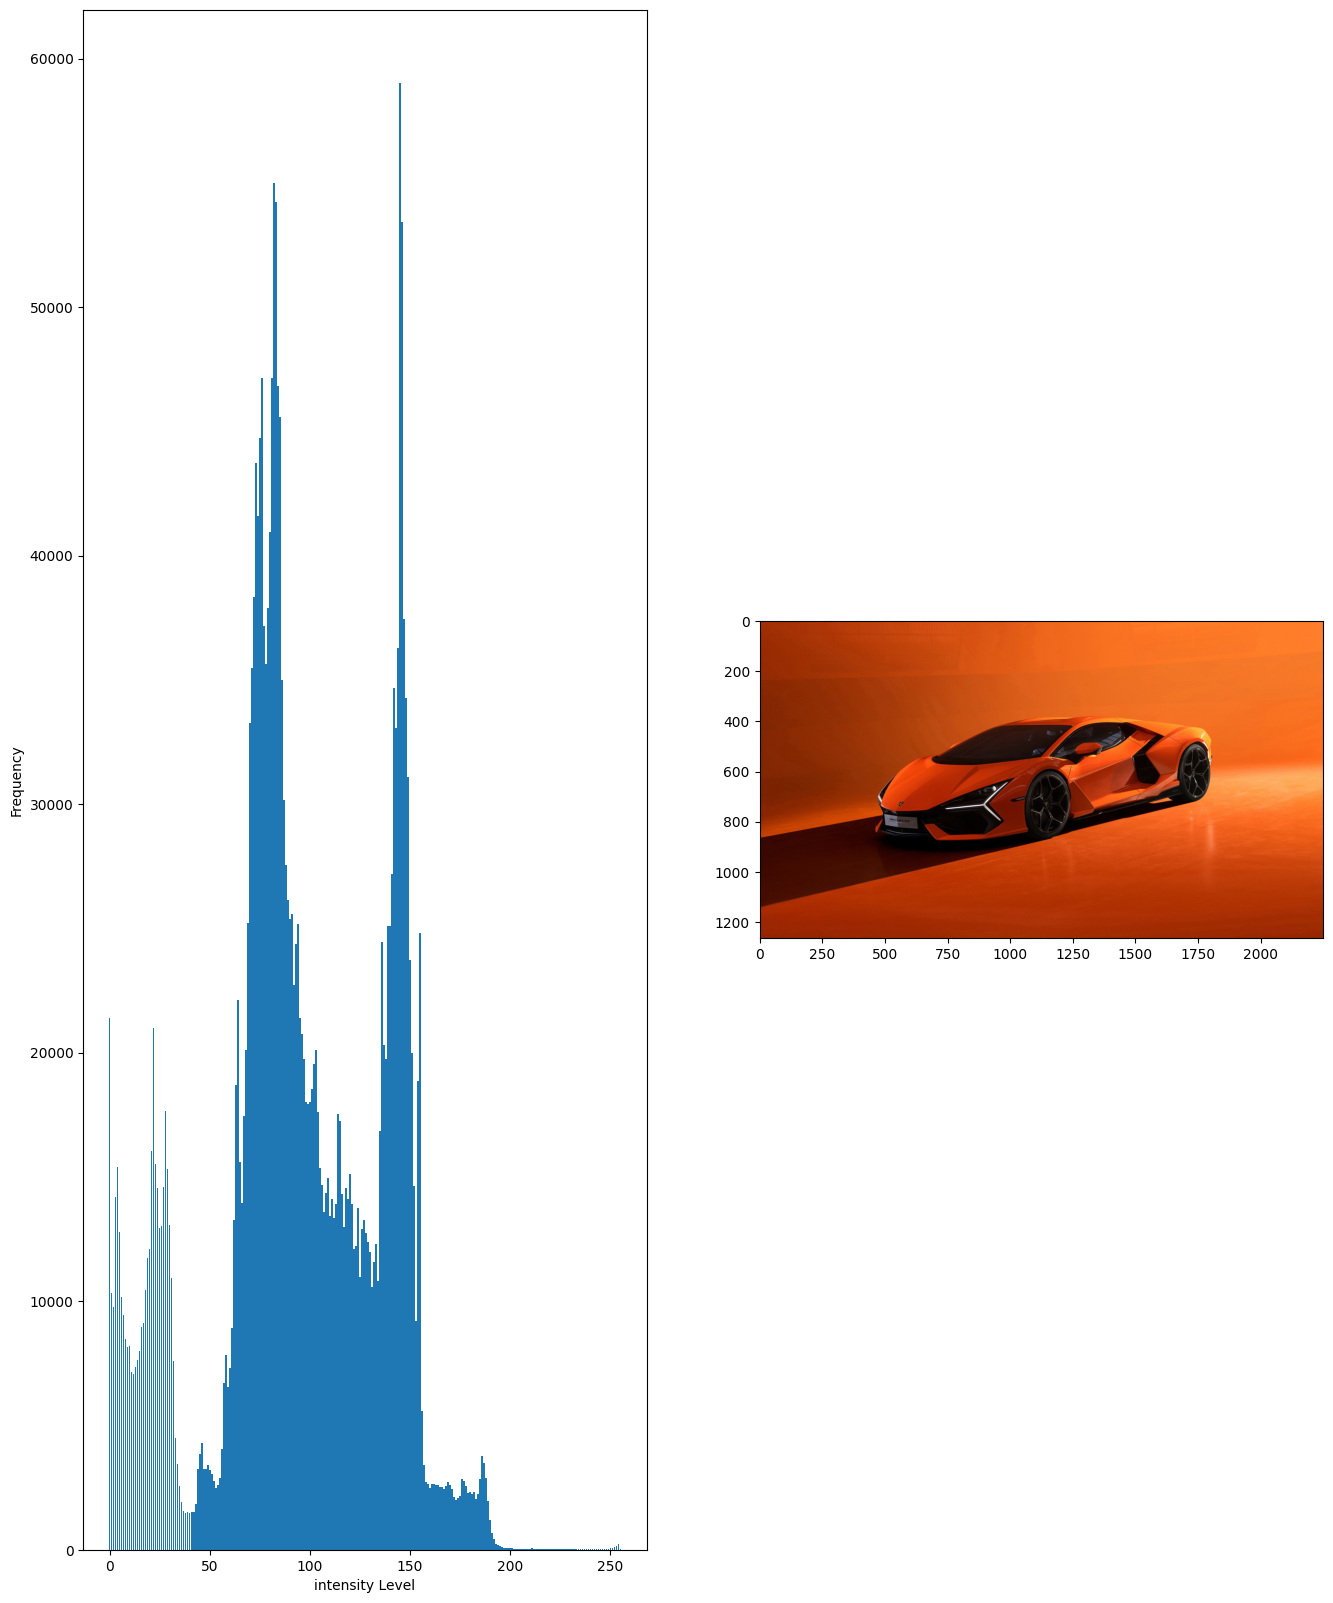

In [7]:
def cal_hist(image: np.ndarray) -> dict:
    hist = {x: 0 for x in range(256)}
    for i in image.ravel():
        hist[i] += 1
    
    return hist

def plot_hist(hist: dict):
    plt.bar(hist.keys(), hist.values())
    plt.xlabel('intensity Level')
    plt.ylabel('Frequency')
    plt.show

img = cv2.imread('2024-lamborghini-revuelto-127-641a1d518802b.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist_result = cal_hist(gray)
plt.figure(figsize=(16,20))
plt.subplot(1, 2, 1)
plot_hist(hist_result)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Histogram Equalization

In [8]:
def hist_eq(image: np.ndarray) -> np.ndarray:
    cumulative_count = {x:0 for x in range(256)}
    hist = cal_hist(image)
    for i in range(256):
        for j in range(i):
            cumulative_count[i] = hist[j]

    normalize_cumulative = {x: cumulative_count[x]/max(cumulative_count.values()) for x in range(256)}

    image_eq = np.zeros(image.shape, dtype="int")
    m, n = image_eq.shape[0], image_eq.shape[1]
    for i in range(m):
        for j in range(n):
            image_eq[i, j] = normalize_cumulative[image[i, j] * 255]

    return image_eq

a = hist_eq(img_1)
a

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7500\820023862.py:14: RuntimeWarning: overflow encountered in scalar multiply
  image_eq[i, j] = normalize_cumulative[image[i, j] * 255]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(922, 1024))

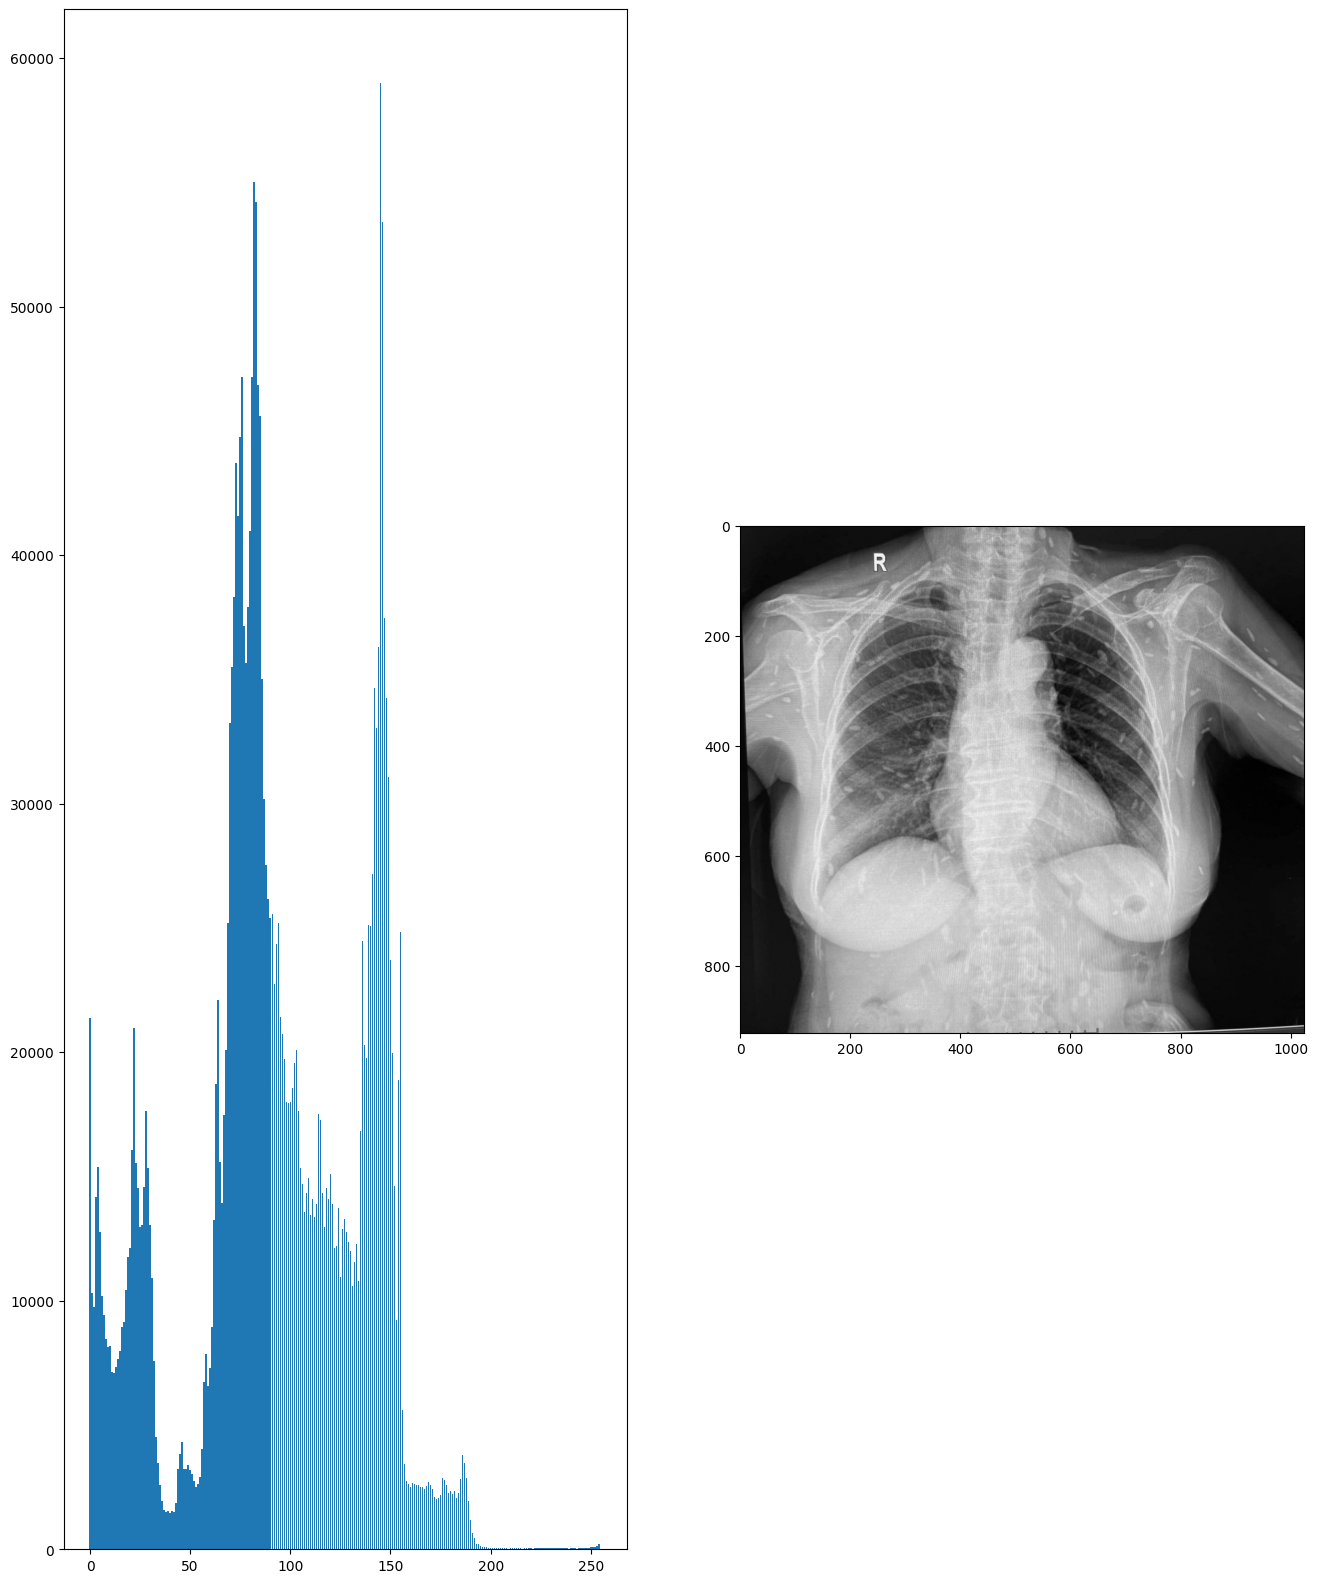

In [11]:
plt.figure(figsize=(16,20))
plt.subplot(1, 2, 1)
plt.bar(hist_result.keys(), hist_result.values())
plt.subplot(1, 2, 2)
plt.imshow(img_1, cmap='gray')

In [ ]:
def histogram_equalization(img: np.ndarray):
    L = 256
    M, N = img.shape[0], img.shape[1]

    hist = np.zeros(L, dtype=int)
    for i in img.ravel():
        hist[i] += 1

    cumulative_count = np.zeros(L, dtype=int)
    for k in range(L):
        cumulative_count[k] = np.sum(hist[0:k+1])

    C_min = min([c for c in cumulative_count if c > 0])

    normalized_cumulative = np.zeros(L, dtype=int)
    for k in range(L):
        normalized_cumulative[k] = round(
            ((cumulative_count[k] - C_min) / (M * N - C_min)) * (L - 1)
        )

    img_eq = np.zeros((M, N), dtype=np.uint8)
    for x in range(M):
        for y in range(N):
            r = img[x, y]
            img_eq[x, y] = normalized_cumulative[r]

    return img_eq, normalized_cumulative

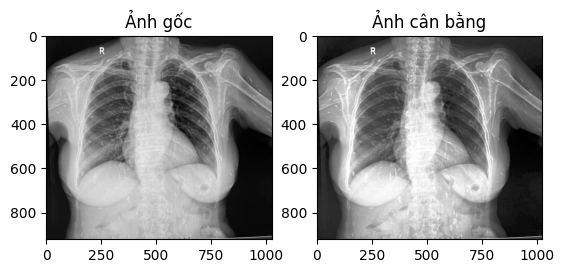

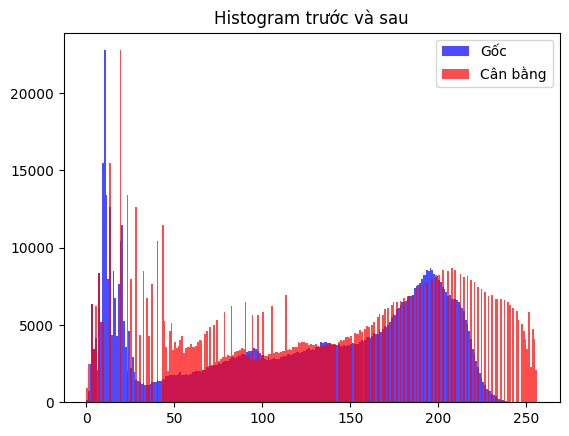

In [ ]:
img = cv2.imread('san-lon-1024x922.jpg', cv2.IMREAD_GRAYSCALE)

# Gọi hàm histogram_equalization
img_eq, normalized_cumulative = histogram_equalization(img)

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap="gray")
plt.title("Ảnh cân bằng")

plt.show()

plt.figure()
plt.hist(img.ravel(), bins=256, range=(0,256), color="blue", alpha=0.7, label="Gốc")
plt.hist(img_eq.ravel(), bins=256, range=(0,256), color="red", alpha=0.7, label="Cân bằng")
plt.legend()
plt.title("Histogram trước và sau")
plt.show()


# Spatial Filtering

In [13]:
def blur_image_mean(image: np.ndarray, kernel_size: int, option: str) -> np.ndarray:
    if option =='Mean':
        blur_image = cv2.blur(image, (kernel_size, kernel_size))

    elif option == 'Gaussian':
        blur_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 10)

    elif option == 'Median':
        blur_image = cv2.medianBlur(image, kernel_size)

    return blur_image

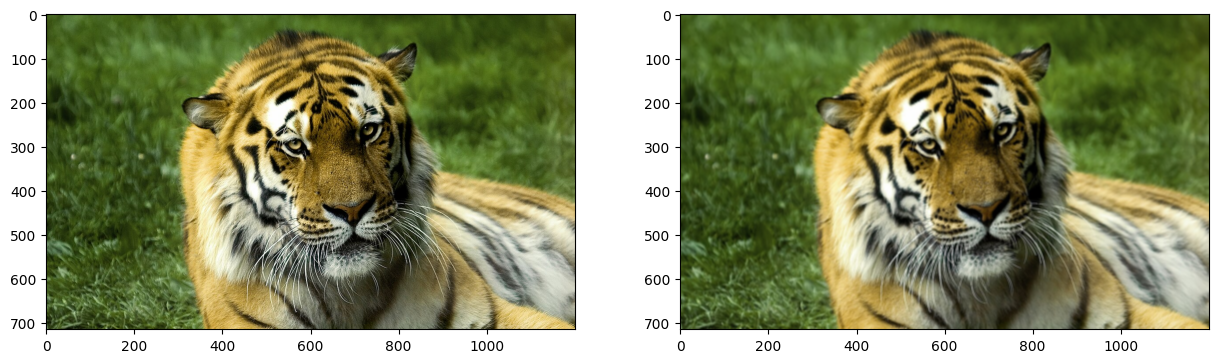

In [17]:
image = cv2.imread('Tigre.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
res_1 = blur_image_mean(image, 5, 'Mean')
res_2 = blur_image_mean(image, 5, 'Gaussian')
res_3 = blur_image_mean(image, 5, 'Median')
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
# plt.subplot(1, 4, 2)
# plt.imshow(res_1)
plt.subplot(1, 2, 2)
plt.imshow(res_2)
# plt.subplot(1, 4, 4)
# plt.imshow(res_3)